# Assignment: Exploratory Data Analysis


**Q1.** To compute the sample mean of a variable $X$:
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range?
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
7. Which giftors provide the most money, in total?

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


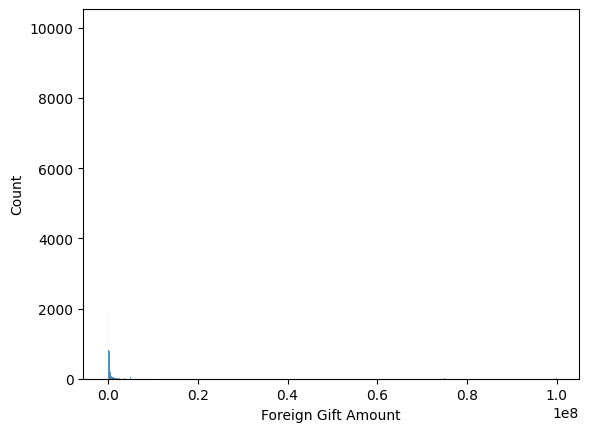

count    2.822100e+04
mean     5.882327e+05
std      3.222011e+06
min     -5.377700e+05
25%      5.700000e+03
50%      9.461500e+04
75%      3.761420e+05
max      1.000000e+08
Name: Foreign Gift Amount, dtype: float64
Foreign Gift Amount
100        581
250000     439
500000     427
50         324
1000       322
          ... 
30231        1
49476        1
3649107      1
463657       1
1024469      1
Name: count, Length: 16271, dtype: int64


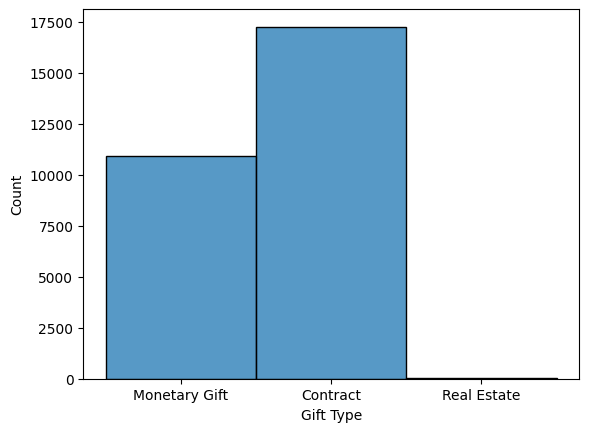

Gift Type
Contract         0.612097
Monetary Gift    0.387513
Real Estate      0.000390
Name: proportion, dtype: float64


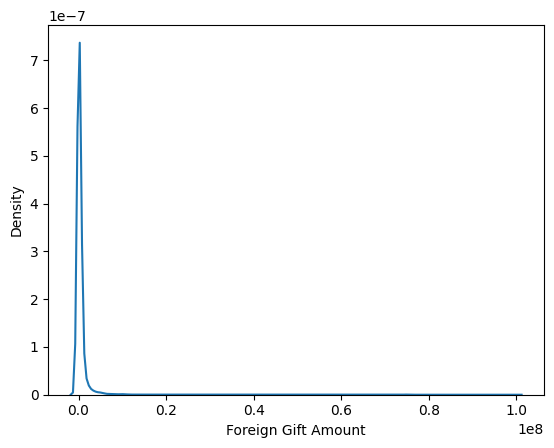

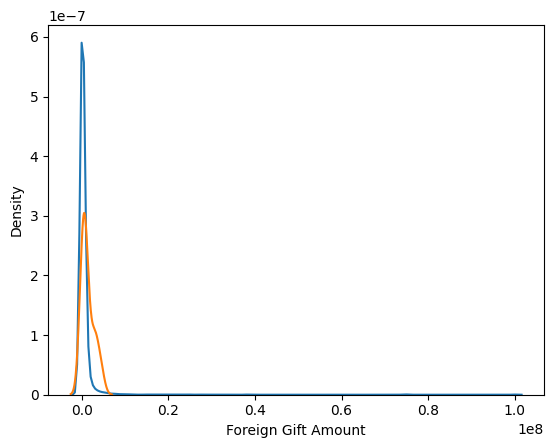

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64
Country of Giftor
PALAU                    1
ERITREA                  1
BELARUS                  1
BARBADOS                 1
CROATIA                  1
SLOVAKIA                 1
TOKELAU                  1
ROMANIA                  1
ARMENIA                  1
ST. LUCIA                1
NEPAL                    1
ST. KITTS-NEVIS          1
TUNISIA                  1
MARSHAL ISLANDS (THE)    1
ANTIGUA                  1
Name: count, dtype: int64
Institution Name
University of California, Los Angeles          3916
California Institute of Technology             2502
Columbia University in the

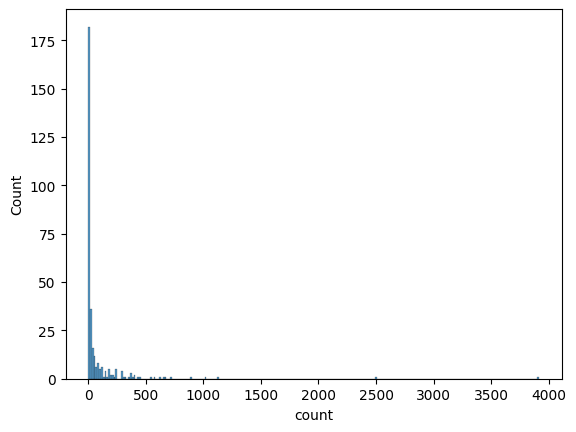

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
Name: Foreign Gift Amount, dtype: int64


In [21]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1
# Load data and display head
df_gifts = pd.read_csv('https://raw.githubusercontent.com/dylanmulieri/EDA/main/assignment/data/ForeignGifts_edu.csv')
display(df_gifts.head())

# 2
# Create histogram for "Foreign Gift Amount" variable
sns.histplot(df_gifts['Foreign Gift Amount'])
plt.show()

# Describe the variable
print(df_gifts['Foreign Gift Amount'].describe())

# Get value counts
print(df_gifts['Foreign Gift Amount'].value_counts())

# Describe findings
'''
The data covers an extremely large and varied range of foreign gift amounts.
The five most common gift amounts alone range from $50 to $500,000.
This makes the creation of a meaningful histogram difficult because there are so many values that cover such a large range.
You would have to further explore and decipher what data is most important to hone in on to create anything meaningful.
'''

# 3
# Create histogram for "Gift Type" variable
sns.histplot(df_gifts['Gift Type'])
plt.show()

# Find what proportion of gifts are contracts, real estate, and monetary gifts
print(df_gifts['Gift Type'].value_counts(normalize=True))

'''
Contracts are 61.2097% of the gifts.
Real estate is 38.7513% of the gifts.
Monetary gifts are 0.0390% of the gifts.
'''

# Create a kernel density plot for "Foreign Gift Amount" variable
sns.kdeplot(df_gifts['Foreign Gift Amount'])
plt.show()

# Create a kernel density plot for "Foreign Gift Amount" variable conditional on "Gift Type" variable
sns.kdeplot(df_gifts[df_gifts['Gift Type'] == 'Contract']['Foreign Gift Amount'])
sns.kdeplot(df_gifts[df_gifts['Gift Type'] == 'Real Estate']['Foreign Gift Amount'])
sns.kdeplot(df_gifts[df_gifts['Gift Type'] == 'Monetary']['Foreign Gift Amount'])
plt.show()

'''
The shape for the kernel density plots conditonal on gift type appear to generally maintain the same shape as each other and the overall plot.
They all have an right skewed distributuion with a massive peak very early on.
The kerenl density plot for the real estate gift type is so small you cannot even see it, which maeks sense since it is less than 1% of the total gifts.
'''

# 5
# Determine the top 15 countries in terms of number of gifts
print(df_gifts['Country of Giftor'].value_counts().head(15))

# Determine the bottom 15 countries in terms of number of gifts
print(df_gifts['Country of Giftor'].value_counts().tail(15))

'''
Top 15 countries with the most gifts in order:
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381

Bottom 15 countries with the most gifts in order:
PALAU                    1
ERITREA                  1
BELARUS                  1
BARBADOS                 1
CROATIA                  1
SLOVAKIA                 1
TOKELAU                  1
ROMANIA                  1
ARMENIA                  1
ST. LUCIA                1
NEPAL                    1
ST. KITTS-NEVIS          1
TUNISIA                  1
MARSHAL ISLANDS (THE)    1
ANTIGUA                  1
'''

# 6
# Determine the top 15 institutions in terms of total amount of money received
print(df_gifts['Institution Name'].value_counts().head(15))

# Create a histogram of total amount received by all institutions
sns.histplot(df_gifts['Institution Name'].value_counts())
plt.show()

'''
Top 15 institutions with the most money received in order:
University of California, Los Angeles          3916
California Institute of Technology             2502
Columbia University in the City of New York    1127
Ohio State University (The)                    1014
Johns Hopkins University                        899
University of Michigan - Ann Arbor              715
Stanford University                             668
Cornell University                              653
University of Pennsylvania                      625
Massachusetts Institute of Technology           582
Yale University                                 550
Harvard University                              453
University of Colorado Denver                   436
University of Chicago (The)                     401
Arizona State University                        400
'''

# 7
# Determine which giftors provide the most money in total
print(df_gifts.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head())

'''
The 5 largest giftors were:
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
'''

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

(30478, 13)
Index(['Host Id', 'Host Since', 'Name', 'Neighbourhood ', 'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'],
      dtype='object')


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

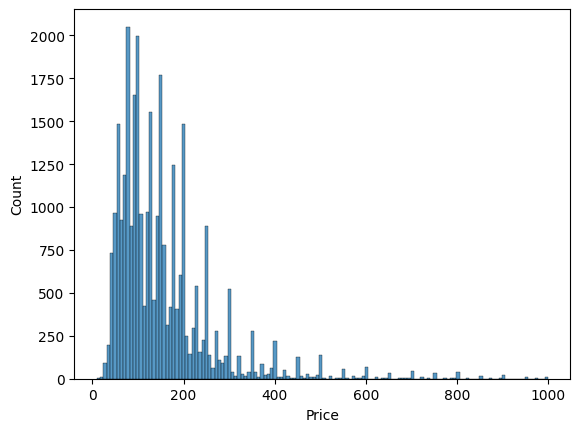

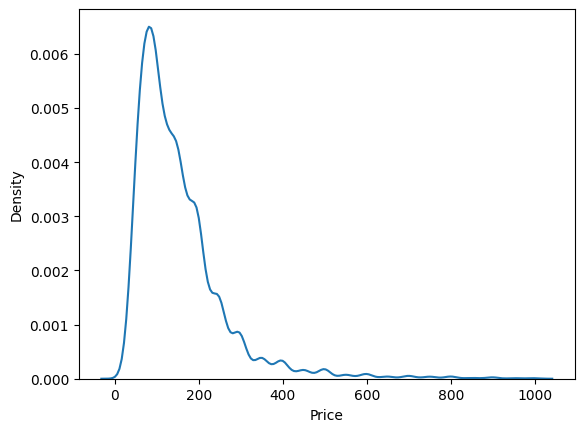

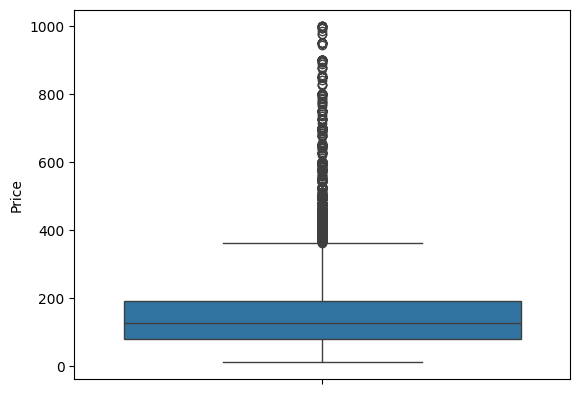

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64


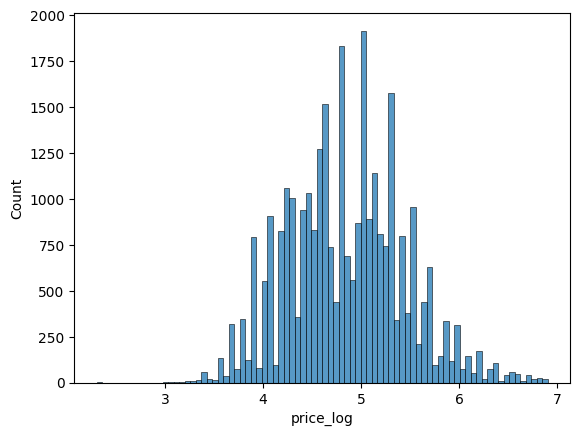

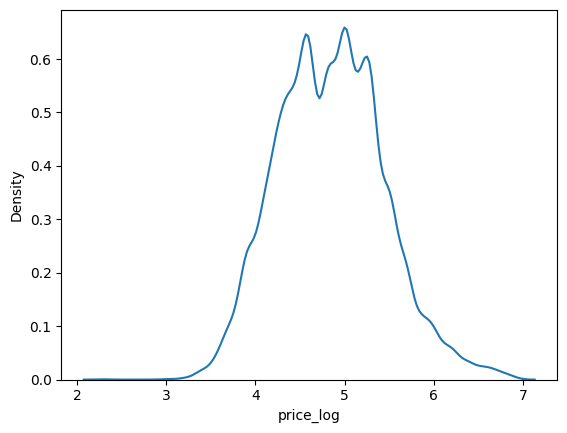

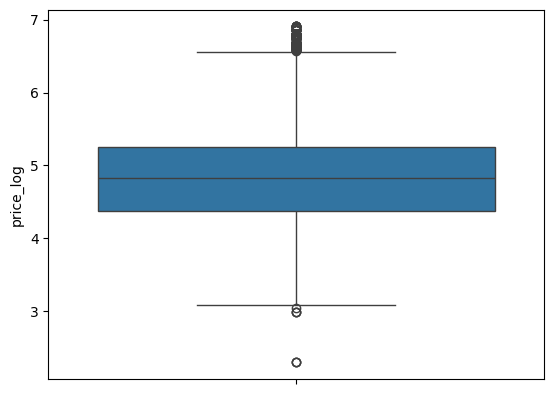

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64


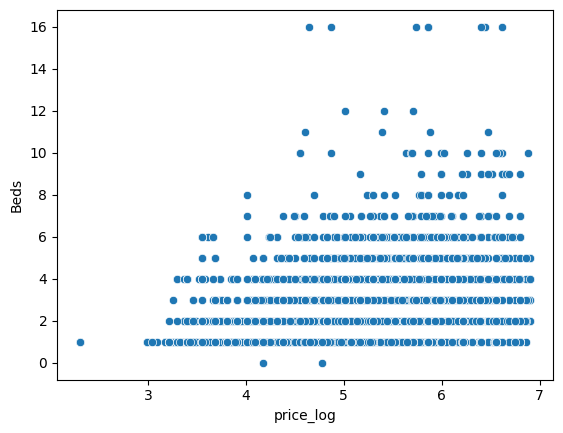

        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000

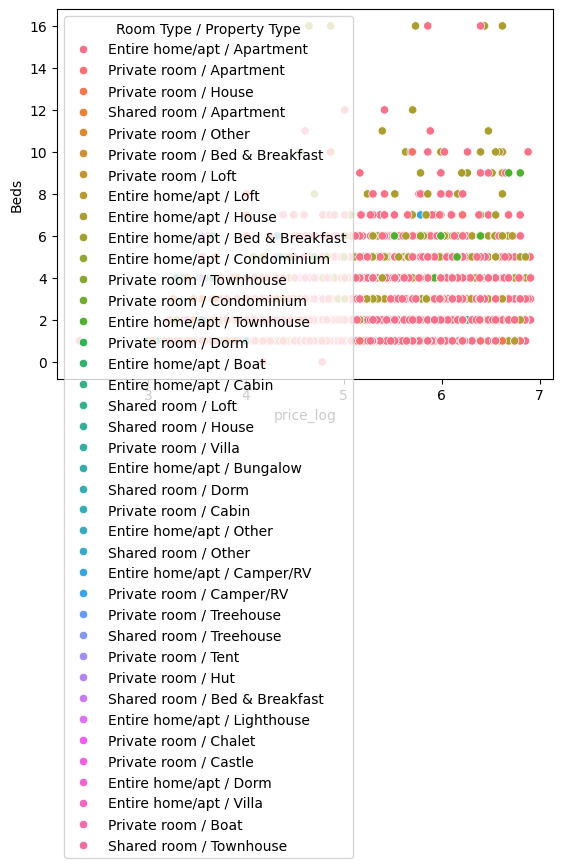

                                   count        mean         std    min  \
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other    

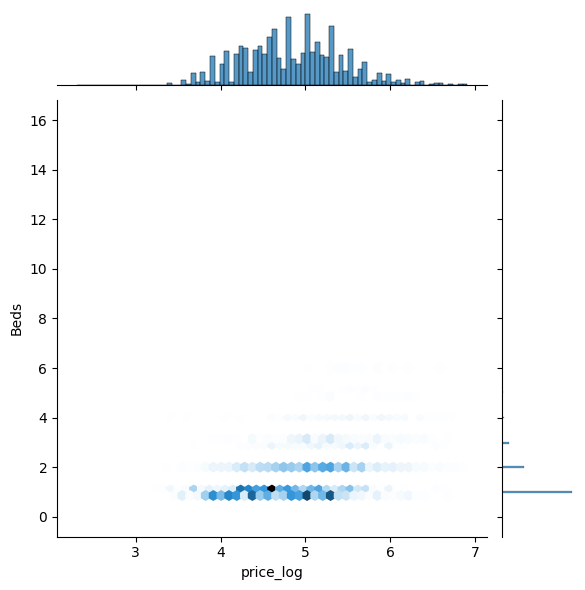

'\nThis plot suggests that most of the data is lower bed count and centrally distributed in price_log.\nThis helps bring some context to the data, helping ignore the extremely expensive outliers\n'

In [48]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1
# Load data and display head
df_airbnb = pd.read_csv('https://raw.githubusercontent.com/dylanmulieri/EDA/main/assignment/data/airbnb_hw.csv')

# 2
# Determine the dimensions of the data
print(df_airbnb.shape)

# Determine what the variables are
print(df_airbnb.columns)

# Examine the first few rows of the data
display(df_airbnb.head())

'''
The data has 30478 observations.
The variables are 'Host Id', 'Host Since', 'Name', 'Neighbourhood ',
'Property Type',
       'Review Scores Rating (bin)', 'Room Type', 'Zipcode', 'Beds',
       'Number of Records', 'Number Of Reviews', 'Price',
       'Review Scores Rating'
'''

# 3
# Cross tabulate "Room Type" and "Property Type"
print(pd.crosstab(df_airbnb['Room Type'], df_airbnb['Property Type']))

'''
For all room types, apartments are most common.
'Treehouse' is the only property type where shared rooms are the most common rental.
Private rooms are more common than entire homes/apartments for 'Bed & Breakfast', 'Castle', 'Chalet',
        'Dorm', 'House', 'Hut', 'Other', 'Tent', and 'Treehouse',  properties.

'''

# 4
# Encountered an error with non-numerics in "Price" variable
# Coerce "Price" to numeric to solve this issue
df_airbnb['Price'] = pd.to_numeric(df_airbnb['Price'], errors='coerce')

# Drop any NA values created during the coersion to numeric
df_airbnb.dropna(subset=['Price'], inplace=True)

# Create a histogram for "Price" variable
sns.histplot(df_airbnb['Price'])
plt.show()

# Create a Kernel Density plot for "Price" variable
sns.kdeplot(df_airbnb['Price'])
plt.show()

# Create a box plot for "Price" variable
sns.boxplot(df_airbnb['Price'])
plt.show()

# Display a statistical description of the "Price" variable
print(df_airbnb['Price'].describe())

'''
The data is very right skewed.
However, the boxplot indicates a significant amount of high-valued outliers, which is the data causing this skew.
Without these outliers, the data would be far more normally distributed.
'''

# Create new variable "price_log" by taking the log() of "Price"
df_airbnb['price_log'] = np.log(df_airbnb['Price'])

# Create a histogram for "price_log" variable
sns.histplot(df_airbnb['price_log'])
plt.show()

# Create a Kernel Density plot for "price_log" variable
sns.kdeplot(df_airbnb['price_log'])
plt.show()

# Create a box plot for "price_log" variable
sns.boxplot(df_airbnb['price_log'])
plt.show()

# Display a statistical description of the "price_log" variable
print(df_airbnb['price_log'].describe())

'''
The utilization of the log() function helped to alleviate the right skew issue,
creating far more normally distributed data.
'''

# 5
# Create a scatterplot of the "price_log" variable and "Beds" variable
sns.scatterplot(data=df_airbnb, x='price_log', y='Beds')
plt.show()

'''
The largest amount of data can be found where there are low bed counts and a high price_log.
There is very little data below 3 price_log.
Few data points surpass 12 beds.
'''

# Create a description of "Price" conditioned on "Beds"
print(df_airbnb.groupby('Beds')['Price'].describe())

'''
The standard deviation is always smaller than the mean.
The mean is roughly between 1.5x-2x the standard deviation for each bed count.
Both mean and standard deviation generally increase with bed count until a count of 9/10ish
'''

# 6
# Create a new column combining "Room Type" and "Property Type" so that they can both be mapped to hue
df_airbnb['Room Type / Property Type'] = df_airbnb['Room Type'] + ' / ' + df_airbnb['Property Type']
# Create a scatterplot of the "price_log" variable and "Beds" variable that is colored by the "Room Type" and "Property Type" variables
sns.scatterplot(data=df_airbnb, x='price_log', y='Beds', hue="Room Type / Property Type")
plt.show()

'''
Note that this method of combining columns to map both to color does create a large and somewhat messy legend.
Generally, the higher bed count rentals are entire homes.
Apartment rooms of all types tend to have the most variation in price_log
'''

# Get a description of "Price" conditioned on "Room Type" and "Property Type"
print(df_airbnb.groupby(['Room Type', 'Property Type'])['Price'].describe())

'''
Entire home/apt and Other have the highest mean at 290.800000 and the highest std dev at 273.526273.
Since thsi data has so many extremely expenisve outliers dragging upt the mean, I'd say median is the better measure of central tendency.
'''

# 7
# Create a jointplot of "price_log" and "Beds" with kind=hex
sns.jointplot(data=df_airbnb, x='price_log', y='Beds', kind='hex')
plt.show()

'''
This plot suggests that most of the data is lower bed count and centrally distributed in price_log.
This helps bring some context to the data, helping ignore the extremely expensive outliers
'''

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

,Active Well Service Rig Count (Number of Rigs)
count,623
unique,538
top,Not Available
freq,32


,count
Active Well Service Rig Count (Number of Rigs),
Not Available,32
2024,4
2401,3
2977,3
2039,3
...,...
3690,1
3565,1
3486,1


,Active Well Service Rig Count (Number of Rigs)
0,1549
1,1677
2,1805
3,1898
4,1991


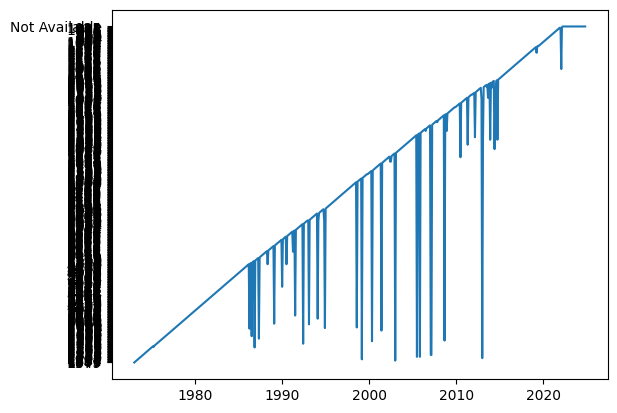

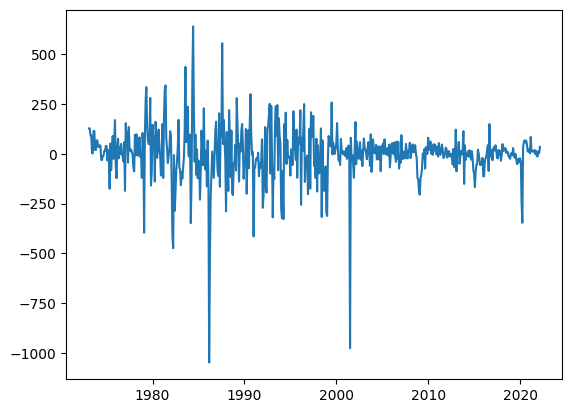

Index(['Month',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)',
       'Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)',
       'Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)',
       'Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)',
       'Active Well Service Rig Count (Number of Rigs)', 'time',
       'Rig Count Difference'],
      dtype='object')


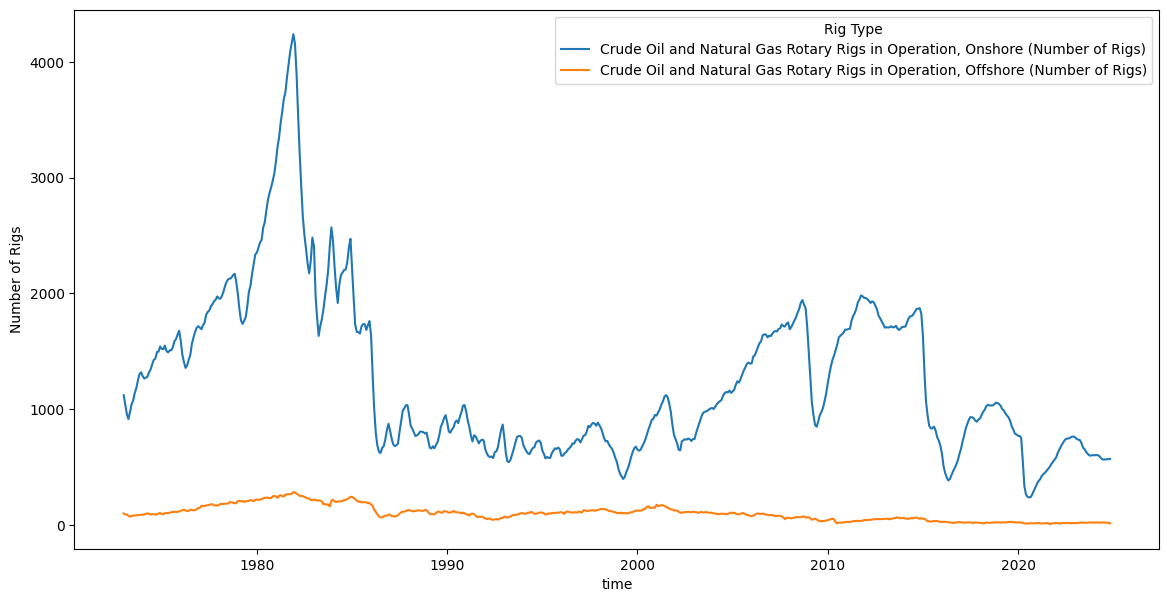

In [55]:
# 1
# Load in the data
df_drilling_rigs = pd.read_csv("https://raw.githubusercontent.com/dylanmulieri/EDA/main/assignment/data/drilling_rigs.csv")

# 2
# Convert "Month" variable to an ordered datetime variable
df_drilling_rigs['time'] = pd.to_datetime(df_drilling_rigs['Month'], format='mixed')

# 3
# Examine "Active Well Service Rig Count (Number of Rigs)" variable
display(df_drilling_rigs['Active Well Service Rig Count (Number of Rigs)'].describe())
display(df_drilling_rigs['Active Well Service Rig Count (Number of Rigs)'].value_counts())
display(df_drilling_rigs['Active Well Service Rig Count (Number of Rigs)'].head())

# Create line plot of "Active Well Service Rig Count (Number of Rigs)" variable as a time series
plt.plot(df_drilling_rigs['time'], df_drilling_rigs['Active Well Service Rig Count (Number of Rigs)'])
plt.show()

'''
Generally, the amount of active rigs has increased over time, with spikes down for what I assume is missing data.
'''

# 4
# Ensure "Active Well Service Rig Count (Number of Rigs)" is numeric
df_drilling_rigs['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(df_drilling_rigs['Active Well Service Rig Count (Number of Rigs)'], errors='coerce')

# Compute the first difference of "Active Well Service Rig Count (Number of Rigs)"
df_drilling_rigs['Rig Count Difference'] = df_drilling_rigs['Active Well Service Rig Count (Number of Rigs)'].diff()

# Plot it over time
plt.plot(df_drilling_rigs['time'], df_drilling_rigs['Rig Count Difference'])
plt.show()

'''
The plot creates a pattern that reminds me of a heart rate monitor.
The values oscillate between positive and negative, generally centered around zero, with the largest spikes in the negative direction
'''

# 5
# Melt the columes for the number of onshore and offshore rigs
# First, get column names
print(df_drilling_rigs.columns)

'''
Relevant columns:
'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)'
'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
'''

# Melt these two columns
id_vars = ['Month', 'time'] # Keeping 'Month' and 'time' as identifier variables
value_vars = [
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)',
    'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'
]

df_melted_rigs = pd.melt(df_drilling_rigs, id_vars=id_vars, value_vars=value_vars, var_name='Rig Type', value_name='Number of Rigs')

# Ensure 'Number of Rigs' is numeric after melting
df_melted_rigs['Number of Rigs'] = pd.to_numeric(df_melted_rigs['Number of Rigs'], errors='coerce')

# Drop NAs
df_melted_rigs.dropna(subset=['Number of Rigs'], inplace=True)

# Plot the melted series
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_melted_rigs, x='time', y='Number of Rigs', hue='Rig Type')
plt.show()